## Data Pre Processing


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

pd.set_option('display.max_rows', None)

dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing Thompson Sampling

In [37]:
d=10
N=10000
no_of_rewards_1=[0]*d
no_of_rewards_0=[0]*d
ad_selected=[]
total_reward=0

In [38]:
for i in range(0, N):
    max_random=0
    ad=0
    for j in range(0, d):
        random_beta=random.betavariate(no_of_rewards_1[j]+1, no_of_rewards_0[j]+1)
        if random_beta>max_random:
            max_random=random_beta
            ad=j

    ad_selected.append(ad)
    reward=dataset.values[i][ad]
    if reward==1:
        no_of_rewards_1[ad]+=1
    else:
        no_of_rewards_0[ad]+=1
            
    total_reward+=reward

In [39]:
total_reward

2600

### Visualizing the results- Histogram

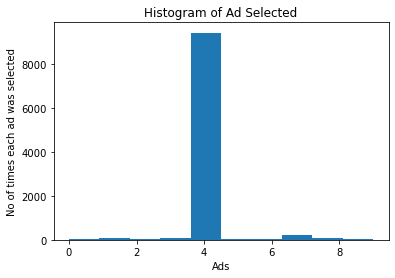

In [9]:
plt.hist(ad_selected)
plt.title("Histogram of Ad Selected")
plt.xlabel("Ads")
plt.ylabel("No of times each ad was selected")
plt.show()